In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import*
import seaborn as sns

In [2]:
bid=pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")
ask=pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")

In [3]:
print(ask.head(3))
print(ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [4]:
print(bid.head(3))
print(bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [5]:
cnn=bid.merge(ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
cnn

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [6]:
cnn.columns = ['time', 'open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'open_ask', 'high_ask', 'low_ask', 'close_ask', 'volume_ask']

In [7]:
cnn.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,open_ask,high_ask,low_ask,close_ask,volume_ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882


In [9]:
file_obj2 = open('cnn.csv', 'w')
cnn.to_csv('cnn.csv', encoding='utf-8', index=False)
file_obj2.close()

In [10]:
new=pd.read_csv('cnn.csv', low_memory=False, sep=',')

In [11]:
new.describe()
org=new.drop(['open_ask', 'high_ask', 'low_ask', 'close_ask'],axis=1)
org.shape
org.head(3)


,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,0.351
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,1.155
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,0.882


In [12]:
org['time'] = pd.to_datetime(org['time'])
org.head(3)

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
0,2023-01-02 23:00:00,24.036,24.059,24.017,24.059,0.3480,0.351
1,2023-01-02 23:05:00,24.064,24.130,24.064,24.092,1.8458,1.155
2,2023-01-02 23:10:00,24.094,24.098,23.972,23.977,0.9030,0.882


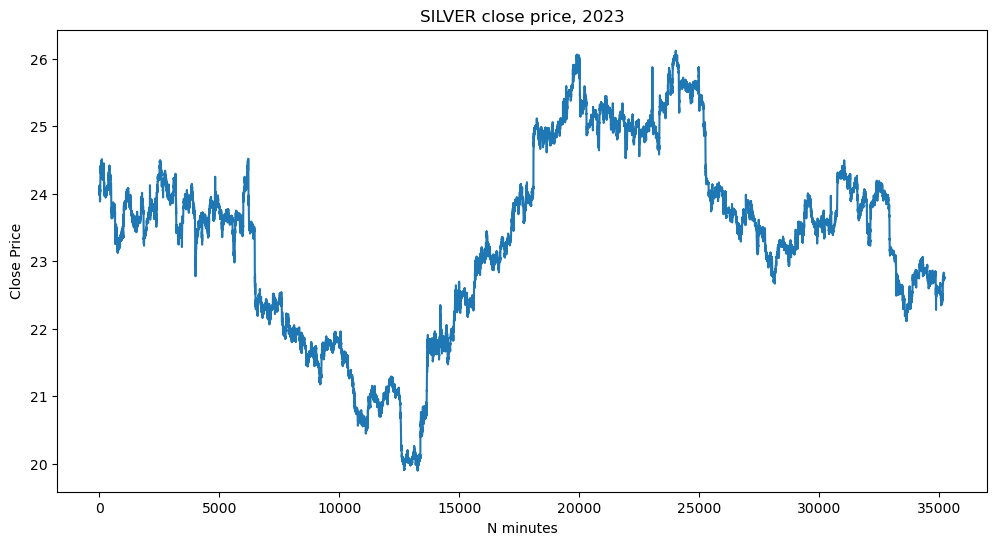

In [13]:

plt.figure(figsize=(12,6))
plt.plot(org['close_bid'])
plt.title('SILVER close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

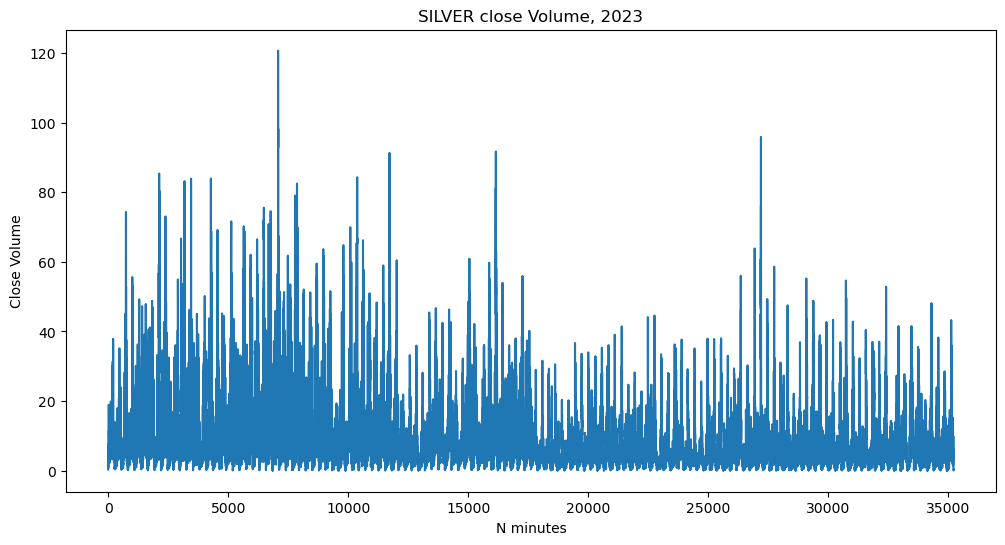

In [14]:

plt.figure(figsize=(12,6))
plt.plot(org['volume_bid'])
plt.title('SILVER close Volume, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close Volume')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# List of columns to normalize
columns_float = ['open_bid', 'high_bid', 'low_bid', 'close_bid', 'volume_bid', 'volume_ask']

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the specified columns in the 'org' DataFrame
org[columns_float] = scaler.fit_transform(org[columns_float])

# OR for Z-score Normalization (Standardization)
# scaler = StandardScaler()
# org[columns_float] = scaler.fit_transform(org[columns_float])

# Check the normalized data
print(org.head())


                 time  open_bid  high_bid   low_bid  close_bid  volume_bid  \
0 2023-01-02 23:00:00  0.665542  0.667579  0.664895   0.669237    0.002884   
1 2023-01-02 23:05:00  0.670040  0.679014  0.672464   0.674538    0.015299   
2 2023-01-02 23:10:00  0.674859  0.673861  0.657649   0.656064    0.007484   
3 2023-01-02 23:15:00  0.656064  0.654856  0.652174   0.656546    0.007410   
4 2023-01-02 23:20:00  0.656225  0.661942  0.658293   0.663454    0.007360   

   volume_ask  
0    0.000960  
1    0.003159  
2    0.002412  
3    0.002445  
4    0.002474  


In [16]:
org.describe()

,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask
count,35220,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,2023-04-02 13:17:53.202725888,0.556525,0.557354,0.555626,0.556525,0.068654,0.095985
min,2023-01-02 23:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-02-16 00:43:45,0.406225,0.406829,0.404509,0.406104,0.021641,0.025894
50%,2023-03-31 20:27:30,0.589076,0.589789,0.588567,0.589076,0.044186,0.060819
75%,2023-05-17 18:11:15,0.679357,0.681269,0.678744,0.679357,0.088571,0.127558
max,2023-06-30 20:55:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.219885,0.220458,0.220439,0.219898,0.074399,0.106733


In [17]:
org.shape

(35220, 7)

In [18]:
# Shift the 'high_bid' and 'low_bid' columns to next row
org['high_bid_shifted_next'] = org['high_bid'].shift(-1)  # Shift high_bid to next row
org['low_bid_shifted_next'] = org['low_bid'].shift(-1)    # Shift low_bid to next row
org.head(3)


,time,open_bid,high_bid,low_bid,close_bid,volume_bid,volume_ask,high_bid_shifted_next,low_bid_shifted_next
0,2023-01-02 23:00:00,0.665542,0.667579,0.664895,0.669237,0.002884,0.000960,0.679014,0.672464
1,2023-01-02 23:05:00,0.670040,0.679014,0.672464,0.674538,0.015299,0.003159,0.673861,0.657649
2,2023-01-02 23:10:00,0.674859,0.673861,0.657649,0.656064,0.007484,0.002412,0.654856,0.652174


In [19]:
import numpy as np

# Columns for input features (use all columns except 'close_bid' for features)
input_columns = ['open_bid', 'high_bid', 'low_bid', 'volume_bid', 'volume_ask', 
                 'high_bid_shifted_next', 'low_bid_shifted_next']

# Column for output target (assuming you're predicting 'close_bid')
output_column = 'close_bid'

# Create the input matrix X (features) and output matrix y (target)
X = org[input_columns].values   # Feature matrix: all rows, specified columns
y = org[output_column].values  # Target matrix: the 'close_bid' column

# Optionally, reshape X if needed for CNN (e.g., 3D matrix for time series)
# For CNNs, we usually reshape X to (samples, features, channels)
X = X.reshape(X.shape[0], X.shape[1], 1)  # 1 channel for each sample

# Check the shape of the matrices
print(f"Input shape (X): {X.shape}")
print(f"Output shape (y): {y.shape}")


Input shape (X): (35220, 7, 1)
Output shape (y): (35220,)


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0258 - mae: 0.0624 - val_loss: 5.9991e-06 - val_mae: 0.0016
Epoch 2/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.5676e-06 - mae: 0.0019 - val_loss: 5.5398e-06 - val_mae: 0.0015
Epoch 3/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.0542e-06 - mae: 0.0019 - val_loss: 5.2388e-06 - val_mae: 0.0014
Epoch 4/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7.5758e-06 - mae: 0.0020 - val_loss: 5.6929e-06 - val_mae: 0.0016
Epoch 5/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 8.3514e-06 - mae: 0.0022 - val_loss: 5.3388e-06 - val_mae: 0.0014
Epoch 6/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1.2141e-05 - mae: 0.0027 - val_loss: 9.6933e-06 - val_mae: 0.0024
Epoch 7/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 9.8844e-06 - mae: 0.0024 - val_loss: 5.0725e-06 - val_mae: 0.0014
Epoch 8/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.1652e-05 - mae: 0.0025 - val_loss: 4.8547e-06 - val_mae: 0.

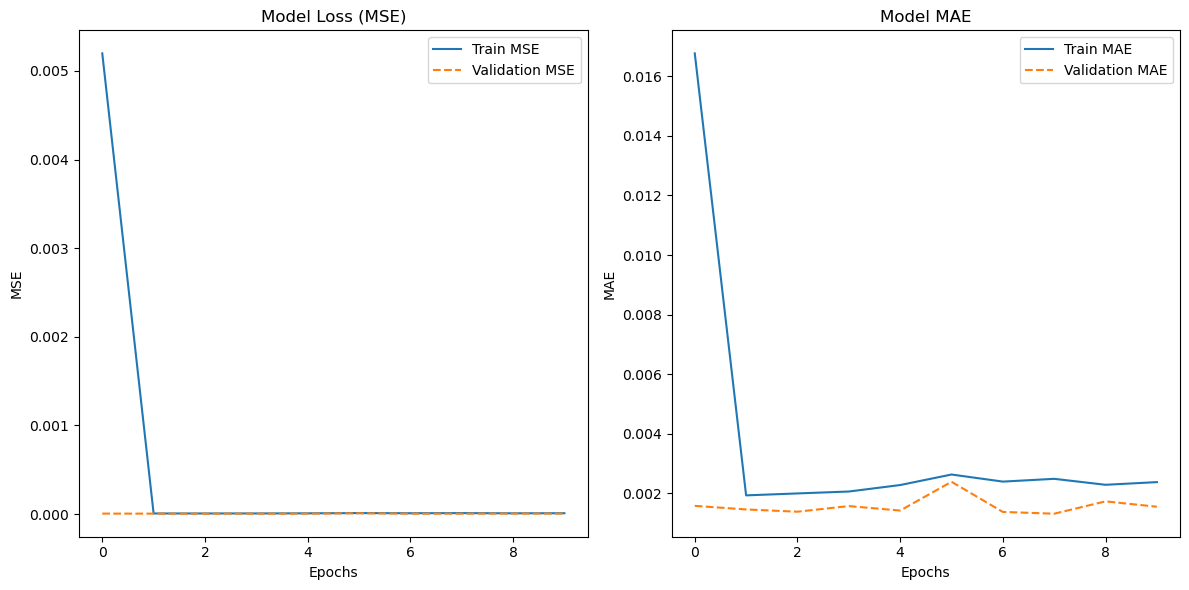

In [20]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Define the CNN model
model = Sequential()

# Add Conv1D layer with 64 filters
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))

# Add another Conv1D layer with 32 filters
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the Conv1D layers to feed it into Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))  # Output layer for regression (single value prediction)

# Compile the model with additional metrics for MAE
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model with validation data (without EarlyStopping)
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Get the final MSE and MAE values
final_mse = history.history['loss'][-1]  # Last value in the loss history
final_mae = history.history['mae'][-1]  # Last value in the MAE history

print(f"Final MSE: {final_mse}")
print(f"Final MAE: {final_mae}")

# Plotting the loss (MSE) and MAE over epochs
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE', linestyle='--')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
